## 1 Этап. Загрузка данных. Общая проверка информации.

In [121]:
import pandas as pd

churn_data = pd.read_csv('churn.csv',  sep=',')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
churn_data.info() #общая информация (количество строк и колонок, тип данных, есть ли незаполненные ячейки)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2 Этап. Обработка данных.
- Создаем копию таблицы, чтобы при переопределении данных была возможность восстановить случайно удаленную информацию.
- Удаляем лишние колонки (RowNumber, так же можно удалить колонку Surname, т.к это личная информация и для статистических выводов и построения графиков она не нужна).
- Проверяем информацию, например, по возратсту клиента (есть ли клиенты с возрастом, который может указывать на неточность данных, например, меньше 18 и больше 100 ) и везде ли указан пол клиента.
- В соответсттвии с колонкой Tenure можем предположить, что для анализа представлен срез клиентов обслуживающихся в банке до 10 лет.

In [123]:
churn_data_df = churn_data.copy() #создаем копию
churn_data_df = churn_data_df.drop(['RowNumber', 'Surname'], axis=1) #удаляем колонки 
churn_data_df.head() #проверяем результат

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
churn_data_df['Age'].max() #максимальный возраст клиента соответствует реальности

92

In [125]:
churn_data_df['Age'].min() #минимальный возраст клиента соответствует реальности

18

In [126]:
churn_data_df['Gender'].value_counts() #все колонки заполнены пол клиента делится только на Male и Female

Male      5457
Female    4543
Name: Gender, dtype: int64

In [127]:
churn_data_df['Tenure'].value_counts() #представлен срез клиентов обслуживающихся до 10 лет

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## 3 Этап. Выполнение заданий.

**1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**
___________________________________________________________________________________________________________________________________

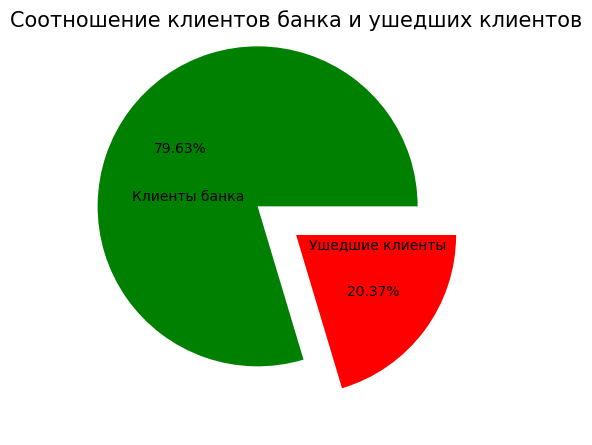

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(4,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_df['Exited'].value_counts(),
    labels=['Клиенты банка', 'Ушедшие клиенты'],
    autopct='%.2f%%',
    labeldistance = 0.1,
    colors=['green', 'red'],
    
    explode = [0.3, 0]
);
axes.set_title('Соотношение клиентов банка и ушедших клиентов', fontsize=15);

- На графике показано соотношение ушедших клиентов т.е закрывших счет и клиентов продолжающих обслуживаться в банке за определенное количество времени. По данным из интернета нормальный отток клиентов (Churn Rate)* для малых и средних компаний составляет 3-5%, для крупных 1%, т.е показатель 20.37% является высоким. 
- Из графика нельзя сделать вывод являются ли оставшиеся клиенты лояльными, т.к мы не знаем как давно они открыли счет, могут ли рекомендовать банк знакомым, как часто пользуются новыми и дополнительными продуктами банка(страховка, кредиты, вклады) и множество других факторов, оценивающих именно лояльность клиента.
- Так же нельзя сделать вывод хороший ли это показатель для этого банка. Т.к нам не известно распределение показателя по времени. 

*источник данных https://emailsoldiers.ru/blog/churn-rate

**2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**
______________________________________________________________________________________________________________________________________

In [155]:
filtered_by_balance = churn_data_df[churn_data_df['Balance'] > 2500]

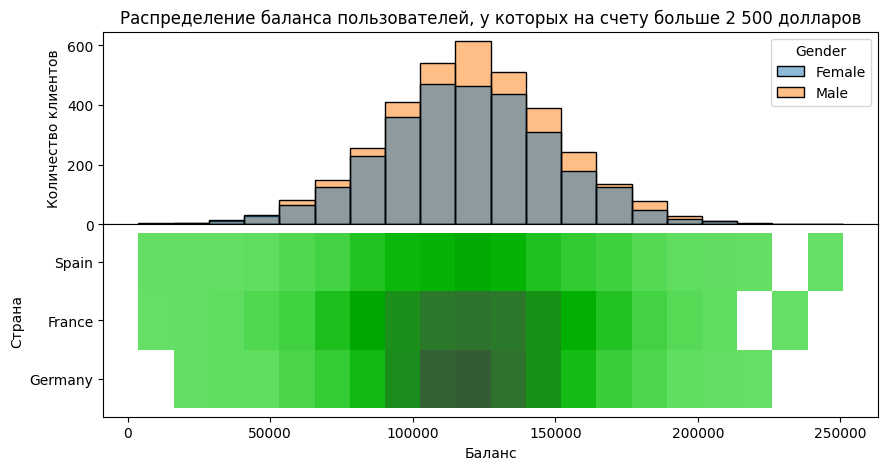

In [151]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    bins=20,
    hue='Gender',
    ax=axes[0],     
);
plt.subplots_adjust(hspace=.0)
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество клиентов')
axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Страна')
sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    y='Geography',
    bins=20,
    color='green',
    ax=axes[1]
);


- Клиентов мужчин больше, чем женщин.
- Основная масса вкладчиков держат на счетах от 95 до 145 тыс. долларов.
- По интенсивности цвета можно увидеть как распределяются клиенты банка по суммам. Например, в Испании вкладчики распределяются более равномерно, в Германии большее количество вкладчиков с суммами 105 тыс. до 130 тыс. 

**3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**
___________________________________________________________________________________________

In [131]:
import plotly
import plotly.express as px 

fig = px.box(
    data_frame =churn_data_df,
    x='Balance', 
    color='Exited',
    height=500, 
    width=700, 
    title='Распределение баланса клиентов в разрезе признака оттока: <br> 1 - ушедшие, 0 - оставшиеся', 
    color_discrete_sequence=['red','green']
)
fig.show()

- 0 - клиент банка, 1 - ушедший клиент
- Из графика видно, что разброс сумм на счетах у клиентов банка(0) больше чем у ушедших клиентов(1). Возможно, это связано с тем, что банк фиксировал поледнюю сумму, перед закрытием счета. Т.е у клиента была какая-то сумма, он ее забирал и уходил из банка. Поэтому у ушедших клиентов почти нет нулевых балансов.
- Ушедшие клиенты хранили на счетах бОльшие суммы.
- Обобщая, можно предположить, что банк предлагал какой-то интересный продукт, например, вклад под высокий процент, но для этого на счету должен был быть депозит не менее определенной суммы (предполагаю, что от 40 тыс.). Как только акция закончилась, часть клиентов просто закрыли счета и забрали эти лимиты, а часть клиентов просто обнулили балансы, но не закрыли счет, ожидая, что банк предложит еще какой-то интересный продукт.

**4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**
________________________________________________________________________________________________________________________________________

In [132]:
import plotly
import plotly.express as px

fig1 = px.histogram(
    data_frame =churn_data_df, 
    x='Age', 
    color='Exited',
    height=500, 
    width=700, 
    histfunc='count',
    title='Распределение возраста клиентов: <br> 1 - ушедшие, 0 - оставшиеся', 
    nbins = 25,
    color_discrete_sequence=['red','green'],
    
)
fig1.show()

import plotly
import plotly.express as px 

fig2 = px.box(
    data_frame =churn_data_df,
    x='Age', 
    color='Exited',
    height=500, 
    width=700, 
    title='Распределение возраста клиентов: <br> 1 - ушедшие, 0 - оставшиеся', 
    color_discrete_sequence=['red','green']
)
fig2.show()

- Основная группа ушедших клиентов - это люди в возрасте от 38 до 51 года. Это социально - активная группа, в этом возрасте люди уже работают, часто имеют семью, недвижимость и предпочтения. Конечно банку стоит обратить на это внимание и разработать программу лояльности или интересное предложение рассчитанное на удержание этой группы. 

**5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**
___________________________________________________________________________________________________________________

In [136]:
salary_score_data = churn_data_df.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
display(salary_score_data)
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=500,
    width=700,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

,CreditScore,Exited,EstimatedSalary
0,350,1,125823.790
1,351,1,169621.690
2,358,1,141959.110
3,359,1,146955.710
4,363,1,100615.140
...,...,...,...
857,848,0,158853.980
858,849,0,132742.870
859,849,1,170130.080
860,850,0,96140.465


- На графике видно что кредитный рейтинг и предполагаемая зарплата не связаны. Из таблицы выше видно, что у людей с высоким кредитным рейтингом разброс по зарплатам очень большой. Скорее всего это связано с наличием или отсутствием зарплатного проекта у клиента. Т.е статистика банка некорректная и требует дополнительного исследования. Так же мы видим, что клиенты с самым низким кредитным рейтингом покинули банк, несмотря на высокие зарплаты. Возможно, это связано с тем, что банк автоматически присваивает низкий кредитный рейтинг(обнуляет), клиентам, которые закрыли счета и уже не являются клиентами банка. 

**6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**
_____________________________________________________________

In [134]:
gender_exited = churn_data_df.groupby('Gender', as_index=False)['Exited'].sum()
display(gender_exited)

,Gender,Exited
0,Female,1139
1,Male,898


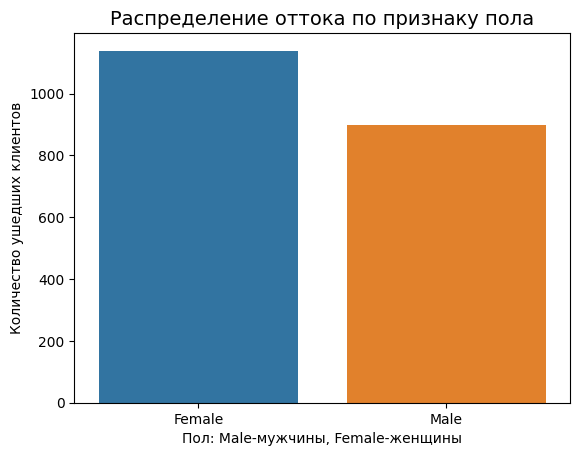

In [175]:
barplot= sns.barplot(x="Gender", y="Exited", orient='v',data=gender_exited)
barplot.set_title('Распределение оттока по признаку пола', fontsize=14);
barplot.set_xlabel('Пол: Male-мужчины, Female-женщины');
barplot.set_ylabel('Количество ушедших клиентов');

- Чаще уходят женщины

**7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграму.**
______________________________________________

In [ ]:
num_of_products_exited = churn_data_df.groupby('NumOfProducts', as_index=False)['Exited'].value_counts() 
display(num_of_products_exited)

,NumOfProducts,Exited,count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,1,220
5,3,0,46
6,4,1,60


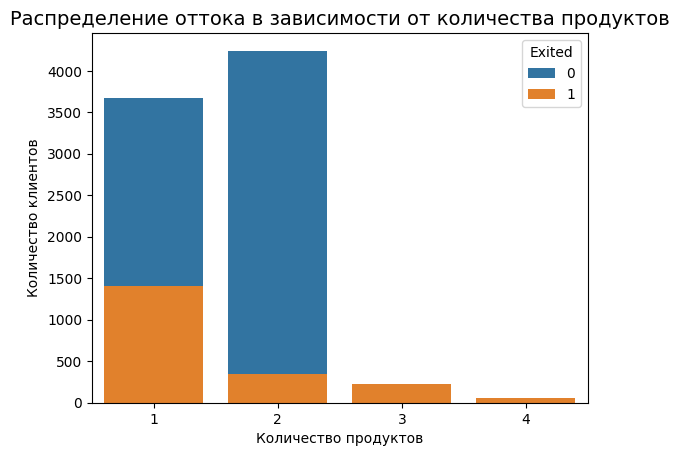

In [177]:
barplot = sns.barplot(
    data=num_of_products_exited,
    x='NumOfProducts',
    y='count',
    hue='Exited',
    orient='v',
    dodge=False
);
barplot.set_title('Распределение оттока в зависимости от количества продуктов', fontsize=14);
barplot.set_xlabel('Количество продуктов');
barplot.set_ylabel('Количество клиентов');

- Основной отток клиентов с одним продуктом. Это подтверждает теорию, что банк предлагал интересную программу, а после ее окончания клиенты перестали пользоваться услугами банка.
- Так же видно, что основная массы оставшихся клиентов пользуются только двумя продуктами банка.

**8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**
_______________________________________________________________

In [138]:
active_clients = churn_data_df.groupby('IsActiveMember', as_index=False)['Exited'].value_counts() 
display(active_clients)

,IsActiveMember,Exited,count
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


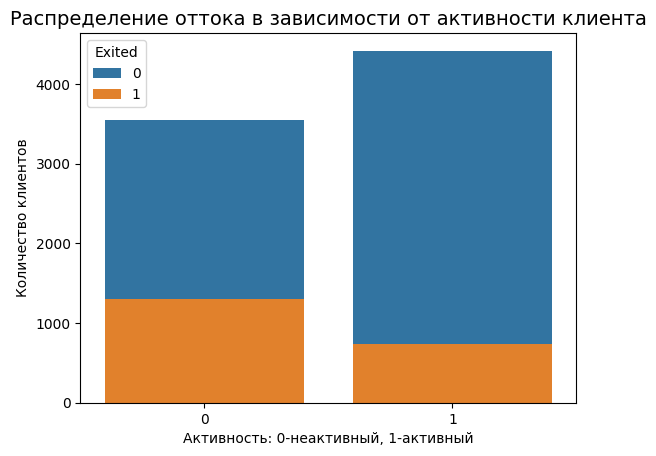

In [178]:
barplot = sns.barplot(
    data=active_clients,
    x='IsActiveMember',
    y='count',
    hue='Exited',
    orient='v',
    dodge=False
);
barplot.set_title('Распределение оттока в зависимости от активности клиента', fontsize=14);
barplot.set_xlabel('Активность: 0-неактивный, 1-активный');
barplot.set_ylabel('Количество клиентов');

**9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**
________________________________________________________________

In [140]:
strana = churn_data_df.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=strana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    hover_name='Geography',
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)

#отображаем график
fig.show()

/tmp/ipykernel_5881/1721961191.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**
_______________________________________________________

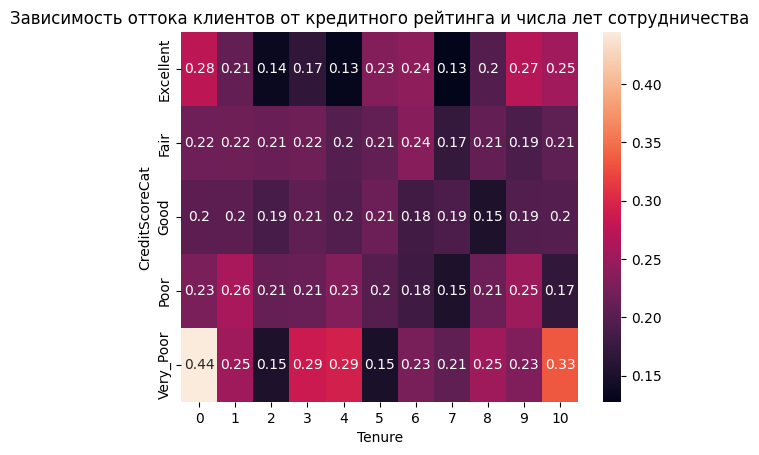

In [142]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data_df['CreditScoreCat'] = churn_data_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');